In [1]:
from brightway2 import *
import bw2data as bd
import pandas as pd
import numpy as np
import os

# BW setup

In [2]:
#Set Project
projects.set_current('plca_metals')

In [3]:
list(databases)

['biosphere3',
 'ecoinvent-3.10-cutoff',
 'NZE_2022',
 'NZE_2025',
 'NZE_2030',
 'NZE_2035',
 'NZE_2040',
 'NZE_2045',
 'NZE_2050',
 'biosphere3_spatialized_flows',
 'NZE_2050 regionalized',
 'SPS_2022',
 'SPS_2025',
 'SPS_2030',
 'SPS_2035',
 'SPS_2040',
 'SPS_2045',
 'SPS_2050']

In [4]:
# Import IW+2.1. methods 
IW_METHODS = [method for method in bd.methods if "impact world+" in " ".join(method).lower()]
IW_METHODS

[('IMPACT World+ v2.0.1, footprint version',
  'climate change',
  'carbon footprint'),
 ('IMPACT World+ v2.0.1, footprint version',
  'ecosystem quality',
  'remaining ecosystem quality damage'),
 ('IMPACT World+ v2.0.1, footprint version',
  'energy resources: non-renewable',
  'fossil and nuclear energy use'),
 ('IMPACT World+ v2.0.1, footprint version',
  'human health',
  'remaining human health damage'),
 ('IMPACT World+ v2.0.1, footprint version',
  'water use',
  'water scarcity footprint'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Ecosystem quality',
  'Climate change, ecosystem quality, long term'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Ecosystem quality',
  'Climate change, ecosystem quality, short term'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Human health',
  'Climate change, human health, long term'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Human health',
  'Climate c

In [50]:
df_iw_methods = pd.DataFrame(IW_METHODS, columns=["Method", "Impact Category", "Subcategory"])
df_iw_methods.to_csv(r'data/iw2.1_methods.csv', index=False)

In [5]:
# Extract methods for IMPACT World+ Damage 2.1
IMPACT_METHODS_DAMAGE = [
    method for method in IW_METHODS 
    if method[0] == 'IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10'
]
IMPACT_METHODS_DAMAGE

[('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Ecosystem quality',
  'Climate change, ecosystem quality, long term'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Ecosystem quality',
  'Climate change, ecosystem quality, short term'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Human health',
  'Climate change, human health, long term'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Human health',
  'Climate change, human health, short term'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Ecosystem quality',
  'Fisheries impact'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Ecosystem quality',
  'Freshwater acidification'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Ecosystem quality',
  'Freshwater ecotoxicity, long term'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Ecosystem quality',
  'Freshwater ecotoxicity, short

In [6]:
# Extract methods for IMPACT World+ Midpoint 2.1
IMPACT_METHODS_MIDPOINTS = [
    method for method in IW_METHODS 
    if method[0] == 'IMPACT World+ Midpoint 2.1_regionalized for ecoinvent v3.10'
]
IMPACT_METHODS_MIDPOINTS

[('IMPACT World+ Midpoint 2.1_regionalized for ecoinvent v3.10',
  'Midpoint',
  'Climate change, long term'),
 ('IMPACT World+ Midpoint 2.1_regionalized for ecoinvent v3.10',
  'Midpoint',
  'Climate change, short term'),
 ('IMPACT World+ Midpoint 2.1_regionalized for ecoinvent v3.10',
  'Midpoint',
  'Fossil and nuclear energy use'),
 ('IMPACT World+ Midpoint 2.1_regionalized for ecoinvent v3.10',
  'Midpoint',
  'Freshwater acidification'),
 ('IMPACT World+ Midpoint 2.1_regionalized for ecoinvent v3.10',
  'Midpoint',
  'Freshwater ecotoxicity'),
 ('IMPACT World+ Midpoint 2.1_regionalized for ecoinvent v3.10',
  'Midpoint',
  'Freshwater eutrophication'),
 ('IMPACT World+ Midpoint 2.1_regionalized for ecoinvent v3.10',
  'Midpoint',
  'Human toxicity cancer'),
 ('IMPACT World+ Midpoint 2.1_regionalized for ecoinvent v3.10',
  'Midpoint',
  'Human toxicity non-cancer'),
 ('IMPACT World+ Midpoint 2.1_regionalized for ecoinvent v3.10',
  'Midpoint',
  'Ionizing radiations'),
 ('IMPACT 

In [7]:
CC = [
    ('IMPACT World+ Midpoint 2.1_regionalized for ecoinvent v3.10', 'Midpoint', 'Climate change, long term'),
    ('IMPACT World+ Midpoint 2.1_regionalized for ecoinvent v3.10', 'Midpoint', 'Climate change, short term')
]

In [8]:
IW_EP = [
    ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10', 'Human health', 'Total human health'),
    ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10', 'Ecosystem quality', 'Total ecosystem quality')
]

# Import metal quantities by scenarios and technology

In [9]:
#Import data from excel file
excel_file = r'data/data_metals.xlsx'
sheet_name = "metals_ei"
df_metals_ei = pd.read_excel(excel_file, sheet_name=sheet_name)

In [10]:
years = ["2022","2030","2040","2050"]

In [11]:
#Multiply the quantities by 1e6 to have kilograms instead of kilotons
df_metals_ei[years] *= 1000000

In [12]:
#Demand by metal and by technology for the scenario NZE
df_NZE = df_metals_ei.loc[df_metals_ei['Scenario'] == 'NZE'].copy()
df_NZE

,Metal,Technology,Market,Reference Product,Location,Scenario,2022,2025,2030,2035,2040,2045,2050
0,Aluminium,Electricity Networks,"market for aluminium, wrought alloy (SM)","aluminium, wrought alloy",World,NZE,1.035700e+10,12423.000000,1.787200e+10,22818.000000,2.640300e+10,25148.000000,2.075900e+10
2,Arsenic,Solar PV,market for arsine,arsine,GLO,NZE,0.000000e+00,0.000000,4.361360e+05,2.506000,1.381130e+07,11.217100,1.254430e+07
4,Boron,Wind,market for boric oxide,boric oxide,GLO,NZE,1.586180e+05,0.282352,7.310900e+05,0.728470,6.915950e+05,0.472797,7.460790e+05
6,Cadmium,Solar PV,"market for cadmium, semiconductor-grade","cadmium, semiconductor-grade",GLO,NZE,4.208430e+05,0.770334,1.224040e+06,1.132610,9.542230e+05,0.598829,4.311890e+05
8,Chromium,Wind,"market for ferrochromium, high-carbon, 68% Cr","ferrochromium, high-carbon, 68% Cr",GLO,NZE,5.031600e+07,90.784300,1.947490e+08,184.310000,1.503200e+08,104.515000,1.550830e+08
10,Cobalt,Battery Storage,market for cobalt sulfate (SM),cobalt sulfate,World,NZE,3.588530e+06,6.229650,1.702110e+07,17.720300,1.443760e+07,6.950820,0.000000e+00
11,Cobalt,EV,market for cobalt sulfate (SM),cobalt sulfate,World,NZE,6.456060e+07,130.418000,1.879930e+08,230.828000,2.439720e+08,278.214000,2.905570e+08
12,Cobalt,Hydrogen,market for cobalt sulfate (SM),cobalt sulfate,World,NZE,1.073460e+04,0.151101,3.020670e+05,0.205945,8.079190e+04,0.055419,7.586900e+04
16,Copper,Battery Storage,"market for copper, cathode (SM)","copper, cathode",World,NZE,2.044680e+07,77.495000,2.581510e+08,440.859000,6.853160e+08,733.830000,6.651570e+08
17,Copper,Electricity Networks,"market for copper, cathode (SM)","copper, cathode",World,NZE,4.181610e+09,5024.260000,8.923600e+09,11444.500000,1.257440e+10,11756.900000,9.777840e+09


In [13]:
#Demand by metal and by technology for the scenario SPS
df_SPS = df_metals_ei.loc[df_metals_ei['Scenario'] == 'SPS'].copy()
df_SPS

,Metal,Technology,Market,Reference Product,Location,Scenario,2022,2025,2030,2035,2040,2045,2050
1,Aluminium,Electricity Networks,"market for aluminium, wrought alloy (SM)","aluminium, wrought alloy",World,SPS,1.035700e+10,11606.000000,1.452700e+10,14482.000000,1.417400e+10,14943.000000,1.434300e+10
3,Arsenic,Solar PV,market for arsine,arsine,GLO,SPS,0.000000e+00,0.000000,1.903290e+05,1.084830,6.381790e+06,7.385250,8.349830e+06
5,Boron,Wind,market for boric oxide,boric oxide,GLO,SPS,1.586180e+05,0.175778,3.149190e+05,0.287788,2.597290e+05,0.329544,4.082260e+05
7,Cadmium,Solar PV,"market for cadmium, semiconductor-grade","cadmium, semiconductor-grade",GLO,SPS,4.208430e+05,0.420292,3.975620e+05,0.395331,4.115000e+05,0.465976,5.035290e+05
9,Chromium,Wind,"market for ferrochromium, high-carbon, 68% Cr","ferrochromium, high-carbon, 68% Cr",GLO,SPS,5.031600e+07,54.177200,7.267500e+07,70.675700,6.586560e+07,81.292200,9.007150e+07
13,Cobalt,EV,market for cobalt sulfate (SM),cobalt sulfate,World,SPS,6.456060e+07,66.370100,7.393740e+07,77.672800,1.053090e+08,133.987000,1.456130e+08
14,Cobalt,Battery Storage,market for cobalt sulfate (SM),cobalt sulfate,World,SPS,3.588530e+06,3.090400,5.454650e+06,6.173410,4.745430e+06,2.258910,0.000000e+00
15,Cobalt,Hydrogen,market for cobalt sulfate (SM),cobalt sulfate,World,SPS,1.073460e+04,0.010316,1.390280e+04,0.007368,3.299830e+03,0.003562,4.953660e+03
21,Copper,Solar PV,"market for copper, cathode (SM)","copper, cathode",World,SPS,6.816450e+08,778.954000,9.072520e+08,924.800000,9.587660e+08,1122.060000,1.261660e+09
22,Copper,Wind,"market for copper, cathode (SM)","copper, cathode",World,SPS,3.937920e+08,427.765000,6.463330e+08,595.255000,5.322900e+08,639.006000,7.206340e+08


In [14]:
df_NZE.to_csv(r'data/df_NZE.csv', index=False)
df_SPS.to_csv(r'data/df_SPS.csv', index=False)

In [15]:
# Total demand by metal, for all technologies for the NZE scenario
df_NZE_all = df_NZE.groupby('Metal')[years].sum()

In [16]:
# Total demand by metal, for all technologies for the SPS scenario
df_SPS_all = df_SPS.groupby('Metal')[years].sum()

# LCA calculations for IEA scenarios

Create a dictionary with all the EI activities (for each metals) and their keys

In [19]:
activities_dict_NZE = {}

for index, row in df_NZE.iterrows():
    metal = row['Metal']
    market = row['Market']
    product = row['Reference Product']
    location = row['Location']
    
    for year in years:
        activity_name = f"act_{metal.lower()}_{year}"
        search_criteria = f"{market}"
        
        activities = Database('NZE_' + year).search(search_criteria, limit=1000)
        
        filtered_activities = [i for i in activities if i['name'] == search_criteria and i['location'] == location 
                                and i['reference product'] == product]
        
        if filtered_activities:
            activity = filtered_activities[0]
            activities_dict_NZE[activity_name] = activity
            print(f"{activity_name}")
        else:
            print(f"No activity found for {activity_name}")

act_aluminium_2022
act_aluminium_2030
act_aluminium_2040
act_aluminium_2050
act_arsenic_2022
act_arsenic_2030
act_arsenic_2040
act_arsenic_2050
act_boron_2022
act_boron_2030
act_boron_2040
act_boron_2050
act_cadmium_2022
act_cadmium_2030
act_cadmium_2040
act_cadmium_2050
act_chromium_2022
act_chromium_2030
act_chromium_2040
act_chromium_2050
act_cobalt_2022
act_cobalt_2030
act_cobalt_2040
act_cobalt_2050
act_cobalt_2022
act_cobalt_2030
act_cobalt_2040
act_cobalt_2050
act_cobalt_2022
act_cobalt_2030
act_cobalt_2040
act_cobalt_2050
act_copper_2022
act_copper_2030
act_copper_2040
act_copper_2050
act_copper_2022
act_copper_2030
act_copper_2040
act_copper_2050
act_copper_2022
act_copper_2030
act_copper_2040
act_copper_2050
act_copper_2022
act_copper_2030
act_copper_2040
act_copper_2050
act_copper_2022
act_copper_2030
act_copper_2040
act_copper_2050
act_dysprosium_2022
act_dysprosium_2030
act_dysprosium_2040
act_dysprosium_2050
act_dysprosium_2022
act_dysprosium_2030
act_dysprosium_2040
act_

In [20]:
activities_dict_NZE

{'act_aluminium_2022': 'market for aluminium, wrought alloy (SM)' (kilogram, World, None),
 'act_aluminium_2030': 'market for aluminium, wrought alloy (SM)' (kilogram, World, None),
 'act_aluminium_2040': 'market for aluminium, wrought alloy (SM)' (kilogram, World, None),
 'act_aluminium_2050': 'market for aluminium, wrought alloy (SM)' (kilogram, World, None),
 'act_arsenic_2022': 'market for arsine' (kilogram, GLO, None),
 'act_arsenic_2030': 'market for arsine' (kilogram, GLO, None),
 'act_arsenic_2040': 'market for arsine' (kilogram, GLO, None),
 'act_arsenic_2050': 'market for arsine' (kilogram, GLO, None),
 'act_boron_2022': 'market for boric oxide' (kilogram, GLO, None),
 'act_boron_2030': 'market for boric oxide' (kilogram, GLO, None),
 'act_boron_2040': 'market for boric oxide' (kilogram, GLO, None),
 'act_boron_2050': 'market for boric oxide' (kilogram, GLO, None),
 'act_cadmium_2022': 'market for cadmium, semiconductor-grade' (kilogram, GLO, None),
 'act_cadmium_2030': 'mark

In [21]:
#Create a dictionary with all the activities and their keys
activities_dict_SPS = {}

for index, row in df_SPS.iterrows():
    metal = row['Metal']
    market = row['Market']
    product = row['Reference Product']
    location = row['Location']
    
    for year in years:
        activity_name = f"act_{metal.lower()}_{year}"
        search_criteria = f"{market}"
        
        activities = Database('SPS_' + year).search(search_criteria, limit=1000)
        
        filtered_activities = [i for i in activities if i['name'] == search_criteria and i['location'] == location 
                                and i['reference product'] == product]
        
        if filtered_activities:
            activity = filtered_activities[0]
            activities_dict_SPS[activity_name] = activity
            print(f"{activity_name}")
        else:
            print(f"No activity found for {activity_name}")

act_aluminium_2022
act_aluminium_2030
act_aluminium_2040
act_aluminium_2050
act_arsenic_2022
act_arsenic_2030
act_arsenic_2040
act_arsenic_2050
act_boron_2022
act_boron_2030
act_boron_2040
act_boron_2050
act_cadmium_2022
act_cadmium_2030
act_cadmium_2040
act_cadmium_2050
act_chromium_2022
act_chromium_2030
act_chromium_2040
act_chromium_2050
act_cobalt_2022
act_cobalt_2030
act_cobalt_2040
act_cobalt_2050
act_cobalt_2022
act_cobalt_2030
act_cobalt_2040
act_cobalt_2050
act_cobalt_2022
act_cobalt_2030
act_cobalt_2040
act_cobalt_2050
act_copper_2022
act_copper_2030
act_copper_2040
act_copper_2050
act_copper_2022
act_copper_2030
act_copper_2040
act_copper_2050
act_copper_2022
act_copper_2030
act_copper_2040
act_copper_2050
act_copper_2022
act_copper_2030
act_copper_2040
act_copper_2050
act_copper_2022
act_copper_2030
act_copper_2040
act_copper_2050
act_dysprosium_2022
act_dysprosium_2030
act_dysprosium_2040
act_dysprosium_2050
act_dysprosium_2022
act_dysprosium_2030
act_dysprosium_2040
act_

In [17]:
def setup_activities_dict(df, scenario_prefix):
    """
    Create a dictionary mapping (scenario, year, metal, technology) to Brightway activities.
    """
    activities_dict = {}
    
    for index, row in df.iterrows():
        metal = row["Metal"]
        market = row["Market"]
        product = row["Reference Product"]
        location = row["Location"]
        
        for year in years:
            database_name = f"{scenario_prefix}_{year}"  # Select the appropriate database
            activity_name = (scenario_prefix, year, metal, row["Technology"])
            search_criteria = market
            
            try:
                activities = Database(database_name).search(search_criteria, limit=1000)
                filtered_activities = [
                    i for i in activities if i["name"] == search_criteria
                    and i["location"] == location
                    and i["reference product"] == product
                ]
                
                if filtered_activities:
                    activities_dict[activity_name] = filtered_activities[0]
                else:
                    activities_dict[activity_name] = None
            except:
                activities_dict[activity_name] = None
    
    return activities_dict

In [35]:
sps_activities_dict = setup_activities_dict(df_SPS, scenario_prefix='SPS')
nze_activities_dict = setup_activities_dict(df_NZE, scenario_prefix='NZE')

In [24]:
def calculate_lca(df, activities_dict, scenario_prefix, lcia_methods):
    """
    Perform LCA calculations for different scenarios, years, metals, and technologies.
    Returns a DataFrame with results disaggregated.
    """
    results = []
    
    for index, row in df.iterrows():
        metal = row["Metal"]
        technology = row["Technology"]
        
        for year in years:
            quantity = row[str(year)]  # Get the metal quantity for the year
            activity_name = (scenario_prefix, year, metal, technology)
            activity = activities_dict.get(activity_name, None)
            
            if activity:
                impact_results = {}
                
                for method in lcia_methods:
                    try:
                        lca = LCA({activity: quantity}, method)
                        lca.lci()
                        lca.lcia()
                        impact_results[method[2]] = lca.score
                    except:
                        impact_results[method[2]] = np.nan  # Assign NaN if calculation fails
                
                results.append({
                    "Scenario": scenario_prefix,
                    "Year": year,
                    "Metal": metal,
                    "Technology": technology,
                    **impact_results
                })
    
    return pd.DataFrame(results)

In [19]:
def calculate_lca_optimized(df, activities_dict, scenario_prefix, lcia_methods):
    """
    Optimized LCA calculations for different scenarios, years, metals, and technologies.
    """
    results = []
    
    for index, row in df.iterrows():
        metal = row["Metal"]
        technology = row["Technology"]
        
        for year in years:
            quantity = row[str(year)]  # Get the metal quantity for the year
            activity_name = (scenario_prefix, year, metal, technology)
            activity = activities_dict.get(activity_name, None)
            
            if activity:
                impact_results = {}

                try:
                    # Initialize LCA object once per activity
                    lca = LCA({activity: quantity}, lcia_methods[0])  # Use first method as reference
                    lca.lci()

                    for method in lcia_methods:
                        lca.switch_method(method)  # Switch to a new impact method without recalculating LCI
                        lca.lcia()
                        impact_results[method[2]] = lca.score
                
                except:
                    for method in lcia_methods:
                        impact_results[method[2]] = np.nan  # Assign NaN if calculation fails

                results.append({
                    "Scenario": scenario_prefix,
                    "Year": year,
                    "Metal": metal,
                    "Technology": technology,
                    **impact_results
                })
    
    return pd.DataFrame(results)


In [20]:
df_sps_damage = calculate_lca_optimized(df_SPS, sps_activities_dict, scenario_prefix='SPS', lcia_methods=IMPACT_METHODS_DAMAGE)

In [21]:
df_sps_damage

,Scenario,Year,Metal,Technology,"Climate change, ecosystem quality, long term","Climate change, ecosystem quality, short term","Climate change, human health, long term","Climate change, human health, short term",Fisheries impact,Freshwater acidification,...,"Photochemical ozone formation, human health",Terrestrial acidification,"Terrestrial ecotoxicity, long term","Terrestrial ecotoxicity, short term",Thermally polluted water,"Water availability, freshwater ecosystem","Water availability, human health","Water availability, terrestrial ecosystem",Total human health,Total ecosystem quality
0,SPS,2022,Aluminium,Electricity Networks,4.561909e+10,1.357277e+10,614807.224476,182919.838364,4.427912e-03,1.008026e+09,...,180.498298,6.379732e+09,2.368035e+08,2.006384e+08,3.022943e+07,177605.236184,21693.128491,4.262036e+06,983417.858191,1.070280e+11
1,SPS,2030,Aluminium,Electricity Networks,4.609491e+10,1.357418e+10,621219.785136,182938.830516,8.513976e-03,1.155014e+09,...,192.086495,7.284086e+09,3.090074e+08,2.679975e+08,3.721617e+07,198518.713669,24247.550669,3.940294e+06,997960.375124,1.120563e+11
2,SPS,2040,Aluminium,Electricity Networks,3.373230e+10,9.821404e+09,454609.320848,132362.796143,9.049793e-03,9.688935e+08,...,151.925317,6.094735e+09,2.866387e+08,2.551808e+08,3.009521e+07,159536.841491,19486.211532,2.587946e+06,742840.181339,8.586101e+10
3,SPS,2050,Aluminium,Electricity Networks,2.473752e+10,7.088276e+09,333386.858188,95528.497627,8.986164e-03,8.386297e+08,...,123.104526,5.261148e+09,2.722345e+08,2.490053e+08,2.931005e+07,134643.803551,16445.716318,1.643285e+06,560130.341893,6.648385e+10
4,SPS,2022,Arsenic,Solar PV,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,SPS,2050,Zinc,Wind,3.549959e+08,1.077581e+08,4784.270315,1452.253393,3.696230e-04,2.493367e+07,...,9.616966,1.699955e+08,6.829803e+06,9.762501e+06,5.977747e+05,23385.965421,2856.417770,3.324993e+05,29891.548204,2.085832e+09
196,SPS,2022,Zirconium,Hydrogen,3.209682e+05,9.679777e+04,4.325679,1.304541,3.971896e-07,7.051886e+03,...,0.002051,4.627755e+04,4.418614e+03,7.198063e+03,2.120276e+02,8.844983,1.080347,5.080861e+02,7.841722,1.182528e+06
197,SPS,2030,Zirconium,Hydrogen,7.685662e+05,2.321095e+05,10.357945,3.128133,1.527416e-06,1.679011e+04,...,0.005346,1.111537e+05,1.299024e+04,2.162458e+04,5.725426e+02,24.985418,3.051779,1.502586e+03,19.414605,3.139892e+06
198,SPS,2040,Zirconium,Hydrogen,4.114420e+05,1.241287e+05,5.544992,1.672879,1.095592e-06,9.696063e+03,...,0.003366,6.481282e+04,9.164256e+03,1.573560e+04,3.832356e+02,16.916978,2.066280,1.064698e+03,11.094563,1.975428e+06


In [36]:
df_sps_damage.to_csv(r'results/df_sps_damage.csv', index=False)

In [22]:
df_sps_midpoints = calculate_lca_optimized(df_SPS, sps_activities_dict, scenario_prefix='SPS', lcia_methods=IMPACT_METHODS_MIDPOINTS)

In [23]:
df_sps_midpoints

,Scenario,Year,Metal,Technology,"Climate change, long term","Climate change, short term",Fossil and nuclear energy use,Freshwater acidification,Freshwater ecotoxicity,Freshwater eutrophication,...,Ionizing radiations,"Land occupation, biodiversity","Land transformation, biodiversity",Marine eutrophication,Mineral resources use,Ozone layer depletion,Particulate matter formation,Photochemical ozone formation,Terrestrial acidification,Water scarcity
0,SPS,2022,Aluminium,Electricity Networks,1.107790e+11,1.186854e+11,1.126538e+12,4.323813e+08,3.275374e+13,770049.040599,...,3.726176e+11,1.358891e+09,1.090529e+07,6.602015e+06,6.037864e+08,876.429470,9.254990e+07,1.983498e+08,4.455488e+08,2.215715e+10
1,SPS,2030,Aluminium,Electricity Networks,1.117257e+11,1.188140e+11,1.158446e+12,4.944347e+08,3.593599e+13,884976.550052,...,5.225422e+11,1.677353e+09,1.903737e+07,7.218978e+06,7.800780e+08,1059.627948,8.862676e+07,2.110841e+08,5.088788e+08,2.476621e+10
2,SPS,2040,Aluminium,Electricity Networks,8.159528e+10,8.608789e+10,8.487620e+11,4.141431e+08,2.895809e+13,765013.754718,...,4.783100e+11,1.556339e+09,2.233353e+07,5.865662e+06,7.228455e+08,914.102894,6.732502e+07,1.669509e+08,4.258961e+08,1.990303e+10
3,SPS,2050,Aluminium,Electricity Networks,5.966934e+10,6.222447e+10,6.240976e+11,3.579079e+08,2.380088e+13,662364.079210,...,4.481864e+11,1.462309e+09,2.268862e+07,4.871921e+06,6.855508e+08,784.100464,5.371241e+07,1.352797e+08,3.677422e+08,1.679750e+10
4,SPS,2022,Arsenic,Solar PV,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,SPS,2050,Zinc,Wind,8.683207e+08,9.343109e+08,1.263940e+10,1.101501e+07,1.618856e+12,34043.348826,...,1.254680e+10,1.402045e+08,1.110462e+06,4.893597e+05,4.270916e+08,25.092592,8.623664e+05,1.056809e+07,1.182073e+07,2.917518e+09
196,SPS,2022,Zirconium,Hydrogen,7.824029e+05,8.369450e+05,1.047325e+07,3.071393e+03,2.221752e+08,67.471972,...,7.749931e+06,1.724319e+05,1.941199e+03,1.072404e+02,2.939605e+05,0.064834,5.566777e+02,2.253312e+03,3.224328e+03,1.103456e+06
197,SPS,2030,Zirconium,Hydrogen,1.874529e+06,2.008564e+06,2.600515e+07,7.338780e+03,5.757113e+08,201.764520,...,1.961439e+07,5.194041e+05,5.902746e+03,2.961050e+02,8.809400e+05,0.193698,1.330577e+03,5.874665e+03,7.740452e+03,3.117057e+06
198,SPS,2040,Zirconium,Hydrogen,1.003820e+06,1.074253e+06,1.429338e+07,4.254052e+03,3.516260e+08,145.363353,...,1.127111e+07,3.804554e+05,4.311510e+03,1.984263e+02,6.323800e+05,0.138589,7.892514e+02,3.698436e+03,4.510960e+03,2.110479e+06


In [30]:
df_sps_midpoints.to_csv(r'results/df_sps_midpoints.csv', index=False)

In [37]:
df_nze_damage = calculate_lca_optimized(df_NZE, nze_activities_dict, scenario_prefix='NZE', lcia_methods=IMPACT_METHODS_DAMAGE)

In [39]:
df_nze_damage

,Scenario,Year,Metal,Technology,"Climate change, ecosystem quality, long term","Climate change, ecosystem quality, short term","Climate change, human health, long term","Climate change, human health, short term",Fisheries impact,Freshwater acidification,...,"Photochemical ozone formation, human health",Terrestrial acidification,"Terrestrial ecotoxicity, long term","Terrestrial ecotoxicity, short term",Thermally polluted water,"Water availability, freshwater ecosystem","Water availability, human health","Water availability, terrestrial ecosystem",Total human health,Total ecosystem quality
0,NZE,2022,Aluminium,Electricity Networks,4.531585e+10,1.348156e+10,610720.428028,181690.578486,4.715089e-03,1.004096e+09,...,179.703054,6.354729e+09,2.367492e+08,2.007152e+08,3.027880e+07,176218.119222,21523.702706,4.224604e+06,9.774829e+05,1.064551e+11
1,NZE,2030,Aluminium,Electricity Networks,5.116747e+10,1.502494e+10,689582.576563,202490.727544,1.737428e-02,1.364254e+09,...,222.906276,8.598617e+09,3.815145e+08,3.340550e+08,4.650174e+07,234796.664314,28678.626360,4.284232e+06,1.122189e+06,1.278148e+11
2,NZE,2040,Aluminium,Electricity Networks,5.582038e+10,1.617818e+10,752289.729165,218032.948734,2.808481e-02,1.756416e+09,...,269.033083,1.104410e+10,5.393248e+08,4.956466e+08,5.476716e+07,278214.715019,33981.810957,4.364063e+06,1.253268e+06,1.483413e+11
3,NZE,2050,Aluminium,Electricity Networks,3.335415e+10,9.522924e+09,449512.905975,128340.182775,1.735317e-02,1.212750e+09,...,175.584702,7.608993e+09,3.997296e+08,3.787628e+08,4.115351e+07,187442.291850,22894.650006,2.380869e+06,7.673307e+05,9.284980e+10
4,NZE,2022,Arsenic,Solar PV,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,NZE,2050,Zinc,Wind,4.347721e+08,1.329939e+08,5859.411229,1792.355586,8.920825e-04,4.313376e+07,...,16.463733,2.941940e+08,1.219126e+07,1.884728e+07,8.472180e+05,38016.863056,4643.470614,5.801652e+05,4.817704e+04,3.421506e+09
204,NZE,2022,Zirconium,Hydrogen,3.124136e+05,9.420535e+04,4.210390,1.269603,4.207295e-07,6.925899e+03,...,0.002026,4.547668e+04,4.415178e+03,7.199775e+03,2.132918e+02,8.793249,1.074029,5.070422e+02,7.669004e+00,1.165325e+06
205,NZE,2030,Zirconium,Hydrogen,1.097390e+07,3.295122e+06,147.894979,44.408265,5.522364e-05,2.930915e+05,...,0.101039,1.958193e+06,2.817023e+05,4.732101e+05,1.347347e+04,532.519273,65.043178,3.203657e+04,3.090247e+02,5.681329e+07
206,NZE,2040,Zirconium,Hydrogen,6.206886e+06,1.862168e+06,83.650038,25.096392,4.667658e-05,2.058440e+05,...,0.074613,1.387068e+06,2.285181e+05,4.008877e+05,8.690554e+03,405.877482,49.574847,2.582697e+04,1.989327e+02,4.186047e+07


In [40]:
df_nze_damage.to_csv(r'results/df_nze_damage.csv', index=False)

In [41]:
df_nze_midpoints = calculate_lca_optimized(df_NZE, nze_activities_dict, scenario_prefix='NZE', lcia_methods=IMPACT_METHODS_MIDPOINTS)

In [42]:
df_nze_midpoints

,Scenario,Year,Metal,Technology,"Climate change, long term","Climate change, short term",Fossil and nuclear energy use,Freshwater acidification,Freshwater ecotoxicity,Freshwater eutrophication,...,Ionizing radiations,"Land occupation, biodiversity","Land transformation, biodiversity",Marine eutrophication,Mineral resources use,Ozone layer depletion,Particulate matter formation,Photochemical ozone formation,Terrestrial acidification,Water scarcity
0,NZE,2022,Aluminium,Electricity Networks,1.100411e+11,1.178985e+11,1.117463e+12,4.306905e+08,3.265397e+13,7.712464e+05,...,3.753145e+11,1.362568e+09,1.111407e+07,6.576721e+06,6.007859e+08,869.602589,9.227376e+07,1.974759e+08,4.438034e+08,2.198410e+10
1,NZE,2030,Aluminium,Electricity Networks,1.239554e+11,1.316985e+11,1.250881e+12,5.837790e+08,4.250515e+13,1.106800e+06,...,6.889736e+11,2.200900e+09,2.843887e+07,8.471233e+06,9.347107e+08,1137.588945,1.044189e+08,2.449520e+08,6.007542e+08,2.929207e+10
2,NZE,2040,Aluminium,Electricity Networks,1.349126e+11,1.420703e+11,1.334980e+12,7.504134e+08,5.264463e+13,1.556668e+06,...,9.152397e+11,3.764029e+09,4.771389e+07,1.059916e+07,1.313287e+09,1538.166433,1.219970e+08,2.956408e+08,7.718192e+08,3.470869e+10
3,NZE,2050,Aluminium,Electricity Networks,8.040247e+10,8.369903e+10,8.090175e+11,5.174515e+08,3.454494e+13,1.067686e+06,...,6.642968e+11,2.773176e+09,3.483499e+07,7.083565e+06,9.794202e+08,1116.370822,7.786394e+07,1.929502e+08,5.318762e+08,2.338437e+10
4,NZE,2022,Arsenic,Solar PV,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,NZE,2050,Zinc,Wind,1.066801e+09,1.155791e+09,1.598592e+10,1.904547e+07,2.817480e+12,7.377157e+04,...,1.998423e+10,3.763868e+08,2.046375e+06,8.529929e+05,7.351775e+08,47.315313,1.531985e+06,1.809201e+07,2.045904e+07,4.742796e+09
204,NZE,2022,Zirconium,Hydrogen,7.615552e+05,8.145211e+05,1.024409e+07,3.017232e+03,2.183904e+08,6.748539e+01,...,7.798517e+06,1.724697e+05,1.945135e+03,1.064741e+02,2.938815e+05,0.064723,5.466247e+02,2.226580e+03,3.168418e+03,1.097002e+06
205,NZE,2030,Zirconium,Hydrogen,2.675894e+07,2.847791e+07,4.158782e+08,1.285446e+05,9.726035e+09,4.388560e+03,...,4.647369e+08,1.143796e+07,1.312536e+05,5.974139e+03,1.911564e+07,4.106626,2.196307e+04,1.110320e+05,1.362979e+05,6.643448e+07
206,NZE,2040,Zirconium,Hydrogen,1.514834e+07,1.609150e+07,2.386664e+08,9.049866e+04,7.408551e+09,3.678112e+03,...,2.900764e+08,1.044617e+07,1.074426e+05,4.720344e+03,1.547854e+07,3.421930,1.661825e+04,8.199274e+04,9.651626e+04,5.063527e+07


In [43]:
df_nze_midpoints.to_csv(r'results/df_nze_midpoints.csv', index=False)

# Import IEA scenario results for the all economy

In [99]:
df_iea = pd.read_csv(r'data/data_iea/WEO2024_AnnexA_Free_Dataset_World.csv')

In [100]:
# We keep only CO2 columns
filtered_categories = [
    "CO2 total",
    "CO2 combustion",
    "CO2 combustion and processes",
    "CO2 total removed"
]

filtered_product = [
    "Total"
]

filtered_flows = [
    "Total energy supply",
    "Total final consumption"
]

filtered_scenarios = [
    "Stated Policies Scenario",
    "Net Zero Emissions by 2050 Scenario"
]

filtered_year = [
    2022, 
    2023,
    2030,
    2035,
    2040,
    2050
]

In [101]:
df_iea = df_iea[df_iea["CATEGORY"].isin(filtered_categories)]
df_iea = df_iea[df_iea["PRODUCT"].isin(filtered_product)]
df_iea = df_iea[df_iea["FLOW"].isin(filtered_flows)]
df_iea = df_iea[df_iea["SCENARIO"].isin(filtered_scenarios)]
df_iea = df_iea[df_iea["YEAR"].isin(filtered_year)]

In [102]:
df_iea

,PUBLICATION,SCENARIO,CATEGORY,PRODUCT,FLOW,UNIT,REGION,YEAR,VALUE
2381,World Energy Outlook 2024,Stated Policies Scenario,CO2 total,Total,Total energy supply,Mt CO2,World,2022,37229.96
2382,World Energy Outlook 2024,Stated Policies Scenario,CO2 total,Total,Total energy supply,Mt CO2,World,2023,37723.05
2383,World Energy Outlook 2024,Stated Policies Scenario,CO2 total,Total,Total energy supply,Mt CO2,World,2030,36170.16
2384,World Energy Outlook 2024,Stated Policies Scenario,CO2 total,Total,Total energy supply,Mt CO2,World,2035,33285.40
2385,World Energy Outlook 2024,Stated Policies Scenario,CO2 total,Total,Total energy supply,Mt CO2,World,2040,31184.82
2386,World Energy Outlook 2024,Stated Policies Scenario,CO2 total,Total,Total energy supply,Mt CO2,World,2050,28635.59
2392,World Energy Outlook 2024,Net Zero Emissions by 2050 Scenario,CO2 total,Total,Total energy supply,Mt CO2,World,2023,37723.05
2393,World Energy Outlook 2024,Net Zero Emissions by 2050 Scenario,CO2 total,Total,Total energy supply,Mt CO2,World,2030,25112.40
2394,World Energy Outlook 2024,Net Zero Emissions by 2050 Scenario,CO2 total,Total,Total energy supply,Mt CO2,World,2035,13484.59
2395,World Energy Outlook 2024,Net Zero Emissions by 2050 Scenario,CO2 total,Total,Total energy supply,Mt CO2,World,2040,6220.91


In [103]:
df_iea = df_iea.drop(columns=['PUBLICATION', 'PRODUCT'])
df_iea

,SCENARIO,CATEGORY,FLOW,UNIT,REGION,YEAR,VALUE
2381,Stated Policies Scenario,CO2 total,Total energy supply,Mt CO2,World,2022,37229.96
2382,Stated Policies Scenario,CO2 total,Total energy supply,Mt CO2,World,2023,37723.05
2383,Stated Policies Scenario,CO2 total,Total energy supply,Mt CO2,World,2030,36170.16
2384,Stated Policies Scenario,CO2 total,Total energy supply,Mt CO2,World,2035,33285.40
2385,Stated Policies Scenario,CO2 total,Total energy supply,Mt CO2,World,2040,31184.82
2386,Stated Policies Scenario,CO2 total,Total energy supply,Mt CO2,World,2050,28635.59
2392,Net Zero Emissions by 2050 Scenario,CO2 total,Total energy supply,Mt CO2,World,2023,37723.05
2393,Net Zero Emissions by 2050 Scenario,CO2 total,Total energy supply,Mt CO2,World,2030,25112.40
2394,Net Zero Emissions by 2050 Scenario,CO2 total,Total energy supply,Mt CO2,World,2035,13484.59
2395,Net Zero Emissions by 2050 Scenario,CO2 total,Total energy supply,Mt CO2,World,2040,6220.91


In [98]:
df_iea

,index,SCENARIO,CATEGORY,FLOW,UNIT,REGION,YEAR,VALUE
0,2381,Stated Policies Scenario,CO2 total,Total energy supply,Mt CO2,World,2022,37229.96
1,2382,Stated Policies Scenario,CO2 total,Total energy supply,Mt CO2,World,2023,37723.05
2,2383,Stated Policies Scenario,CO2 total,Total energy supply,Mt CO2,World,2030,36170.16
3,2384,Stated Policies Scenario,CO2 total,Total energy supply,Mt CO2,World,2035,33285.40
4,2385,Stated Policies Scenario,CO2 total,Total energy supply,Mt CO2,World,2040,31184.82
5,2386,Stated Policies Scenario,CO2 total,Total energy supply,Mt CO2,World,2050,28635.59
6,2392,Net Zero Emissions by 2050 Scenario,CO2 total,Total energy supply,Mt CO2,World,2023,37723.05
7,2393,Net Zero Emissions by 2050 Scenario,CO2 total,Total energy supply,Mt CO2,World,2030,25112.40
8,2394,Net Zero Emissions by 2050 Scenario,CO2 total,Total energy supply,Mt CO2,World,2035,13484.59
9,2395,Net Zero Emissions by 2050 Scenario,CO2 total,Total energy supply,Mt CO2,World,2040,6220.91


# Plots 

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.graph_objects as go

In [11]:
df_sps_damage = pd.read_csv(r'results/df_sps_damage.csv')
df_nze_damage = pd.read_csv(r'results/df_nze_damage.csv')

## Stacked bar from 2022 to 2050 for metals and technologies

We want to see the contribution of metals or technologies on total EQ and HH impacts per year.
- a) We need to interpolate results
- b) We need to aggregate results per metals or technologies

In [81]:
def plot_stacked_area(df, group_by, value_col, title, y_label, color_palette="tab20", custom_colors=None, threshold=0.01, save_path="plots/stacked_area"):
    """
    Generate a stacked area plot with optional custom colors and conditional aggregation.

    Parameters:
    - df: DataFrame with data
    - group_by: Column to group by ('Metal' or 'Technology')
    - value_col: Column containing impact values
    - title: Plot title
    - y_label: Label for Y-axis (e.g., "Impact (unit)")
    - color_palette: Colormap name for automatic coloring (default: "tab20")
    - custom_colors: Dict with manual colors (e.g., {"Solar PV": "#1f77b4"})
    - threshold: Threshold for grouping small categories into "Other" (applies only to Metals, not Technologies)
    - save_path: Base filename for saving plots (without extension)
    
    Outputs:
    - Saves PDF and PNG versions of the figure
    """

    # Ensure directory exists
    os.makedirs(os.path.dirname(save_path), exist_ok=True)

    # Aggregate data
    df_grouped = df.groupby(["Year", group_by])[value_col].sum().reset_index()

    # Apply threshold only for Metals, keep all Technologies
    if group_by == "Metal":
        total_contributions = df_grouped.groupby(group_by)[value_col].sum()
        significant_categories = total_contributions[total_contributions / total_contributions.sum() >= threshold].index
        df_grouped[group_by] = df_grouped[group_by].apply(lambda x: x if x in significant_categories else "Other")

    # Pivot for stacked area plot
    df_pivot = df_grouped.pivot_table(index="Year", columns=group_by, values=value_col, aggfunc="sum")

    # Sort categories based on first year's contribution (largest to smallest)
    first_year = df_pivot.index.min()
    sorted_categories = df_pivot.loc[first_year].sort_values(ascending=False).index
    df_pivot = df_pivot[sorted_categories]

    # Assign colors (Fix: Apply to both Metals & Technologies)
    unique_categories = df_pivot.columns
    if custom_colors:
        # Apply user-defined colors for both Metals & Technologies
        color_dict = {cat: custom_colors.get(cat, "gray") for cat in unique_categories}
    else:
        # Otherwise, use colormap
        cmap = cm.get_cmap(color_palette, len(unique_categories))
        color_dict = {cat: cmap(i) for i, cat in enumerate(unique_categories)}

    # Generate plot
    fig, ax = plt.subplots(figsize=(7.2, 4.5))
    colors = [color_dict.get(col, "gray") for col in df_pivot.columns]
    ax.stackplot(df_pivot.index, df_pivot.T, labels=df_pivot.columns, colors=colors, alpha=0.8)

    # Formatting
    ax.set_title(title)
    ax.set_ylabel(y_label)

    # Sort legend in the same order as the stacked areas
    handles, labels = ax.get_legend_handles_labels()
    legend_order = [labels.index(cat) for cat in sorted_categories if cat in labels]
    sorted_handles = [handles[i] for i in legend_order]
    sorted_labels = [labels[i] for i in legend_order]

    ax.legend(sorted_handles, sorted_labels, loc="upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()

    # Save figures
    plt.savefig(f"{save_path}.pdf", format="pdf", dpi=600)
    plt.savefig(f"{save_path}.png", format="png", dpi=600)
    plt.show()


In [82]:
# Define custom colors for technologies
custom_tech_colors = {
    "Electricity Networks": "#8c510a",
    "Solar PV": "#d8b365",
    "Wind": "#f6e8c3",
    "EV": "#c7eae5",
    "Battery Storage": "#5ab4ac",
    "Hydrogen": "#01665e"  # Generic color for small categories
}

In [83]:
# Define custom colors for metals
custom_metal_colors = {
    "Copper": "#d53e4f",
    "Aluminium": "#fc8d59",
    "Nickel": "#fee08b",
    "Graphite": "#e6f598",
    "Silicon": "#99d594",
    "Other": "#3288bd"  # Generic color for small categories
}

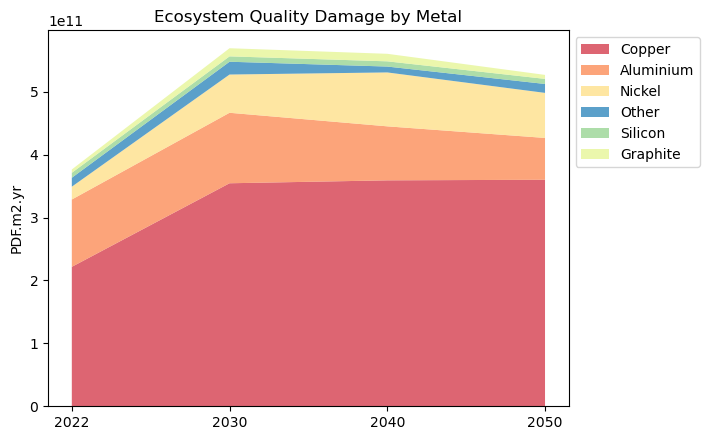

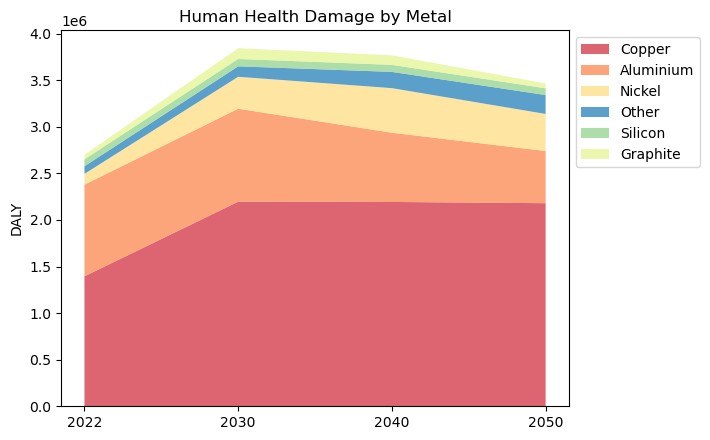

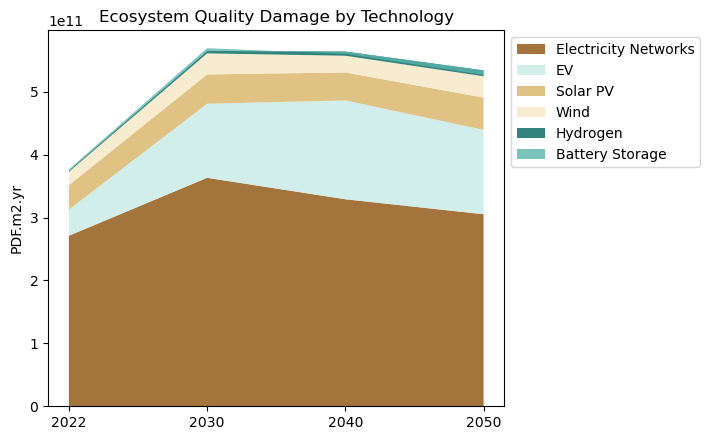

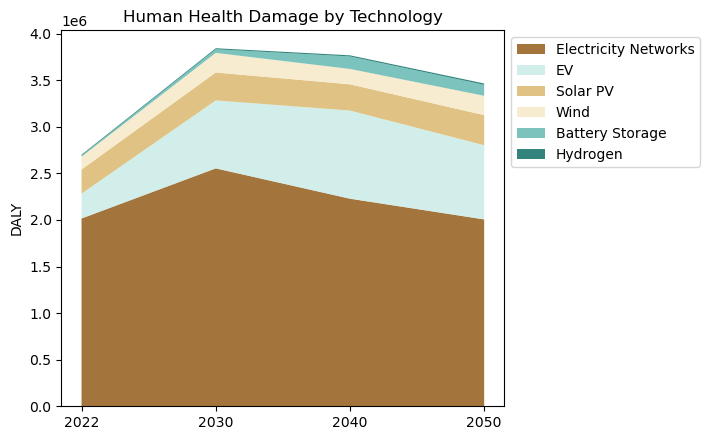

In [84]:
# Generate plots
fig_sps_metal_eq = plot_stacked_area(df_sps_damage, "Metal", "Total ecosystem quality", "Ecosystem Quality Damage by Metal", "PDF.m2.yr", custom_colors=custom_metal_colors, save_path="results/plots/stacked_area/fig_sps_metal_eq")
fig_sps_metal_hh = plot_stacked_area(df_sps_damage, "Metal", "Total human health", "Human Health Damage by Metal", "DALY", custom_colors=custom_metal_colors, save_path="results/plots/stacked_area/fig_sps_metal_hh")
fig_sps_tech_eq = plot_stacked_area(df_sps_damage, "Technology", "Total ecosystem quality", "Ecosystem Quality Damage by Technology", "PDF.m2.yr", custom_colors=custom_tech_colors, save_path="results/plots/stacked_area/fig_sps_tech_eq")
fig_sps_tech_hh = plot_stacked_area(df_sps_damage, "Technology", "Total human health", "Human Health Damage by Technology", "DALY", custom_colors=custom_tech_colors, save_path="results/plots/stacked_area/fig_sps_tech_hh")

## Stacked barplot for MP contribution

In [4]:
# Midpoints for ecosystem quality
EQ = [
'Climate change, ecosystem quality, long term',
'Climate change, ecosystem quality, short term',
'Fisheries impact',
'Freshwater acidification',
'Freshwater ecotoxicity, long term',
'Freshwater ecotoxicity, short term',
'Freshwater eutrophication',
'Ionizing radiations, ecosystem quality',
'Land occupation, biodiversity',
'Land transformation, biodiversity',
'Marine acidification, long term',
'Marine acidification, short term',
'Marine ecotoxicity, long term',
'Marine ecotoxicity, short term',
'Marine eutrophication',
'Photochemical ozone formation, ecosystem quality',
'Terrestrial acidification',
'Terrestrial ecotoxicity, long term',
'Terrestrial ecotoxicity, short term',
'Thermally polluted water',
'Water availability, freshwater ecosystem',
'Water availability, terrestrial ecosystem'
]

In [5]:
# Midpoints for human health
HH = [
'Climate change, human health, long term',
'Climate change, human health, short term',
'Human toxicity cancer, long term',
'Human toxicity cancer, short term',
'Human toxicity non-cancer, long term',
'Human toxicity non-cancer, short term',
'Ionizing radiations, human health',
'Ozone layer depletion',
'Particulate matter formation',
'Photochemical ozone formation, human health',
'Water availability, human health'
]

In [155]:
def plot_stacked_bar(df, impact_columns, total_col, title, color_palette="Paired", custom_colors=None, save_path="plots/stacked_bar"):
    """
    Generate a stacked bar plot showing the contribution of different midpoint indicators to the total impact.

    Parameters:
    - df: DataFrame with data
    - impact_columns: List of midpoint impact indicators (e.g., EQ or HH categories)
    - total_col: Column containing the total impact for normalization (e.g., 'Total ecosystem quality' or 'Total human health')
    - title: Plot title
    - y_label: Label for Y-axis (e.g., "Percentage contribution (%)")
    - color_palette: Colormap name for automatic coloring (default: "Paired") if no custom colors are provided
    - custom_colors: Dictionary with predefined colors for certain categories
    - save_path: Base filename for saving plots (without extension)
    
    Outputs:
    - Saves PDF and PNG versions of the figure
    """

    # Ensure directory exists
    os.makedirs(os.path.dirname(save_path), exist_ok=True)

    # Aggregate data by year
    df_grouped = df.groupby("Year")[impact_columns + [total_col]].sum()

    # Convert to percentage of total impact
    df_percent = df_grouped[impact_columns].div(df_grouped[total_col], axis=0) * 100

    # Sort categories based on first year's contribution (largest to smallest)
    first_year = df_percent.index.min()
    sorted_categories = df_percent.loc[first_year].sort_values(ascending=False).index
    df_percent = df_percent[sorted_categories]

    # Assign colors: use custom colors if provided, else use a colormap
    if custom_colors:
        color_dict = {cat: custom_colors.get(cat, "gray") for cat in sorted_categories}
    else:
        cmap = cm.get_cmap(color_palette, len(sorted_categories))
        color_dict = {cat: cmap(i) for i, cat in enumerate(sorted_categories)}

    # Generate plot
    fig, ax = plt.subplots(figsize=(7.2, 5))
    colors = [color_dict[col] for col in df_percent.columns]
    df_percent.plot(kind="bar", stacked=True, color=colors, ax=ax, width=0.8)

    # Formatting
    ax.set_title(title, fontsize=12)
    ax.set_ylabel("Percentage contribution (%)", fontsize=10)
    ax.set_xlabel("")
    ax.set_xticklabels(df_percent.index, rotation=360)

    # Legend formatting: Reduce size, place below if necessary
    ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=5, frameon=False)

    plt.tight_layout()

    # Save figures
    plt.savefig(f"{save_path}.pdf", format="pdf", dpi=600)
    plt.savefig(f"{save_path}.png", format="png", dpi=600)
    plt.show()


In [156]:
def generate_full_color_dict(impact_categories, custom_colors, colormap="tab20"):
    """
    Ensures all impact categories receive a distinct color.
    
    - Uses predefined colors for important categories.
    - Assigns unique colors to remaining categories from a colormap.

    Parameters:
    - impact_categories: List of all impact categories
    - custom_colors: Dictionary of manually defined colors for key categories
    - colormap: Matplotlib colormap to use for additional categories
    
    Returns:
    - A complete color dictionary for all impact categories
    """
    
    # Get a colormap with enough distinct colors
    cmap = cm.get_cmap(colormap, len(impact_categories))

    # Start with predefined colors
    full_color_dict = custom_colors.copy()

    # Assign unique colors to missing categories
    for i, cat in enumerate(impact_categories):
        if cat not in full_color_dict:
            full_color_dict[cat] = cmap(i)  # Assign a unique color

    return full_color_dict

In [157]:
custom_colors_eq = {
    "Freshwater ecotoxicity, long term": "#1b9e77",  # Green-blue
    "Climate change, ecosystem quality, long term": "#d95f02",  # Orange
    "Terrestrial acidification": "#7570b3",  # Dark blue
    "Marine acidification, long term": "#e7298a",  # Pink
    "Climate change, ecosystem quality, short term": "#66a61e",  # Green
    "Land transformation, biodiversity": "#e6ab02",  # Gold
    "Freshwater ecotoxicity, short term": "#a6761d",  # Brown
    "Freshwater acidification": "#666666",  # Gray
}
   # Generate a full color dictionary for Ecosystem Quality categories
full_custom_colors_eq = generate_full_color_dict(EQ, custom_colors_eq, colormap="tab20")

C:\Users\mp_ma\AppData\Local\Temp\ipykernel_13660\1347601563.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(colormap, len(impact_categories))


In [158]:
# Define the directory for saving bar plots
barplot_dir = "results/plots/stacked_barplots"
os.makedirs(barplot_dir, exist_ok=True)

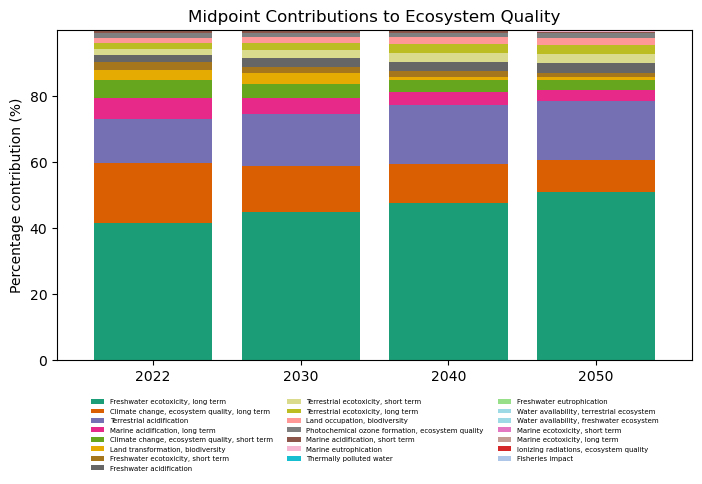

In [159]:
fig_sps_mp_eq = plot_stacked_bar(df_sps_damage, EQ, "Total ecosystem quality",
                 "Midpoint Contributions to Ecosystem Quality",
                 custom_colors=full_custom_colors_eq,
                 save_path=f"{barplot_dir}/fig_sps_mp_eq")

C:\Users\mp_ma\AppData\Local\Temp\ipykernel_13660\2032936229.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(color_palette, len(sorted_categories))


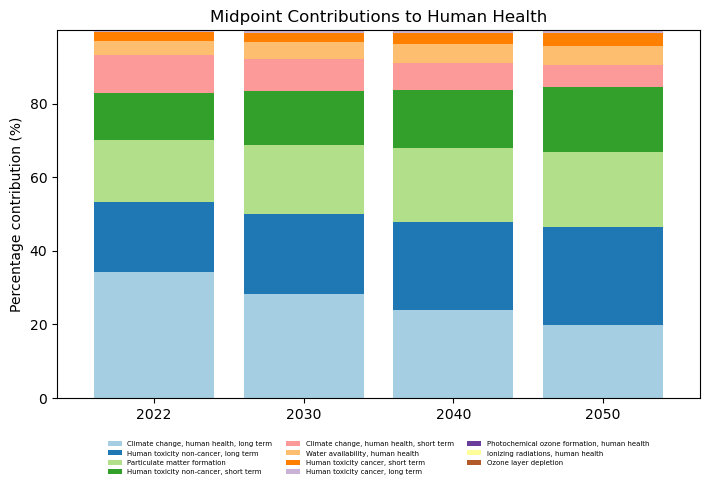

In [160]:
fig_sps_mp_hh = plot_stacked_bar(df_sps_damage, HH, "Total human health", 
                                 "Midpoint Contributions to Human Health", 
                                 custom_colors=None,
                                 save_path=f"{barplot_dir}/fig_sps_mp_hh")

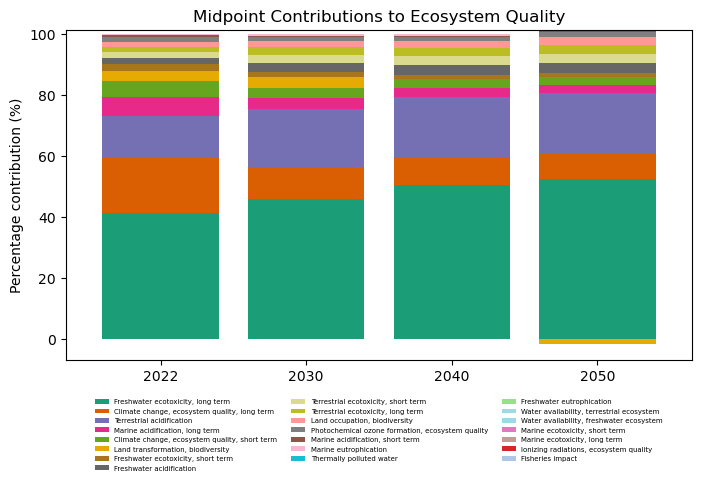

In [161]:
fig_nze_mp_eq = plot_stacked_bar(df_nze_damage, EQ, "Total ecosystem quality",
                 "Midpoint Contributions to Ecosystem Quality", 
                 custom_colors=full_custom_colors_eq,
                 save_path=f"{barplot_dir}/fig_nze_mp_eq")

C:\Users\mp_ma\AppData\Local\Temp\ipykernel_13660\2032936229.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(color_palette, len(sorted_categories))


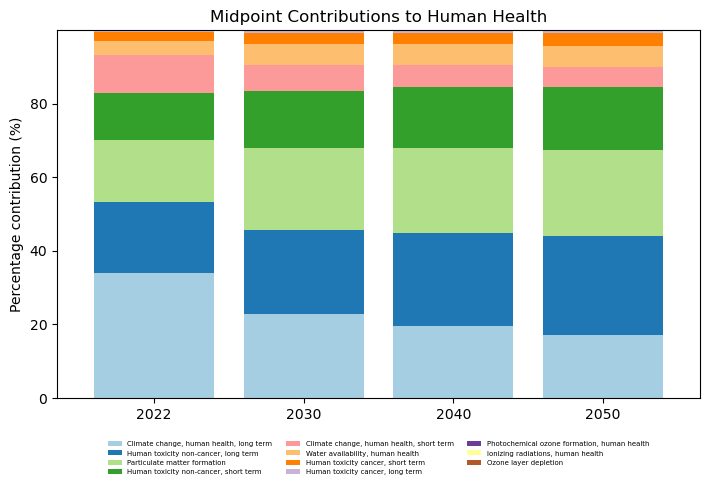

In [162]:
fig_nze_mp_hh = plot_stacked_bar(df_nze_damage, HH, "Total human health", 
                                 "Midpoint Contributions to Human Health",
                                 custom_colors=None,
                                 save_path=f"{barplot_dir}/fig_nze_mp_hh")

## Barplot scenario comparison

In [166]:
def plot_scenario_comparison(df1, df2, total_col, scenario1_label, scenario2_label, title, y_label, colors=("blue", "orange"), save_path="plots/barplots_scenario_comparison"):
    """
    Generate a grouped bar plot comparing two scenarios over time.

    Parameters:
    - df1: First DataFrame (Scenario 1)
    - df2: Second DataFrame (Scenario 2)
    - total_col: Column containing the total impact (e.g., 'Total ecosystem quality' or 'Total human health')
    - scenario1_label: Label for first scenario
    - scenario2_label: Label for second scenario
    - title: Plot title
    - y_label: Label for Y-axis (e.g., "Impact (unit)")
    - colors: Tuple of two colors for the bars
    - save_path: Base filename for saving plots (without extension)
    
    Outputs:
    - Saves PDF and PNG versions of the figure
    """

    # Ensure directory exists
    os.makedirs(os.path.dirname(save_path), exist_ok=True)

    # Aggregate data by year
    df1_grouped = df1.groupby("Year")[total_col].sum().reset_index()
    df2_grouped = df2.groupby("Year")[total_col].sum().reset_index()

    # Merge data to align years (outer join to keep all years)
    merged_df = pd.merge(df1_grouped, df2_grouped, on="Year", how="outer", suffixes=(f"_{scenario1_label}", f"_{scenario2_label}"))

    # Sort by year
    merged_df = merged_df.sort_values("Year")

    # Define positions for grouped bars
    x_labels = merged_df["Year"].astype(str)
    x = np.arange(len(x_labels))
    width = 0.35  # Width of bars

    # Generate plot
    fig, ax = plt.subplots(figsize=(7.5, 5))

    ax.bar(x - width/2, merged_df[f"{total_col}_{scenario1_label}"], width, label=scenario1_label, color=colors[0])
    ax.bar(x + width/2, merged_df[f"{total_col}_{scenario2_label}"], width, label=scenario2_label, color=colors[1])

    # Formatting
    ax.set_title(title, fontsize=12)
    ax.set_ylabel(y_label, fontsize=10)
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels, rotation=0, ha="right")

    # Legend
    ax.legend(loc="upper left", fontsize=9)

    plt.tight_layout()

    # Save figures
    plt.savefig(f"{save_path}.pdf", format="pdf", dpi=600)
    plt.savefig(f"{save_path}.png", format="png", dpi=600)
    plt.show()


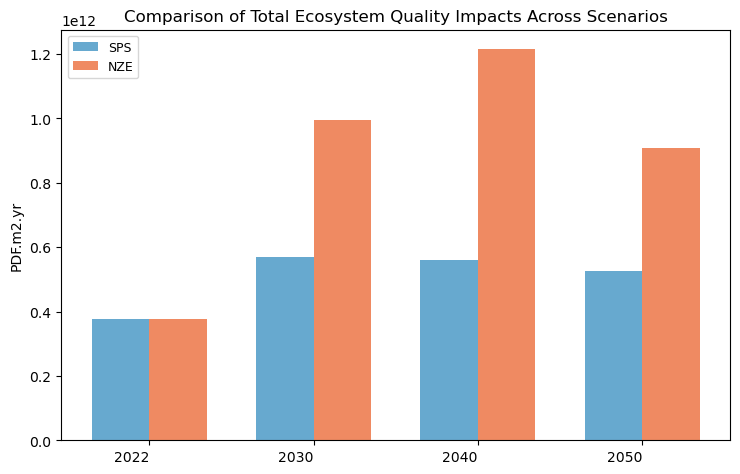

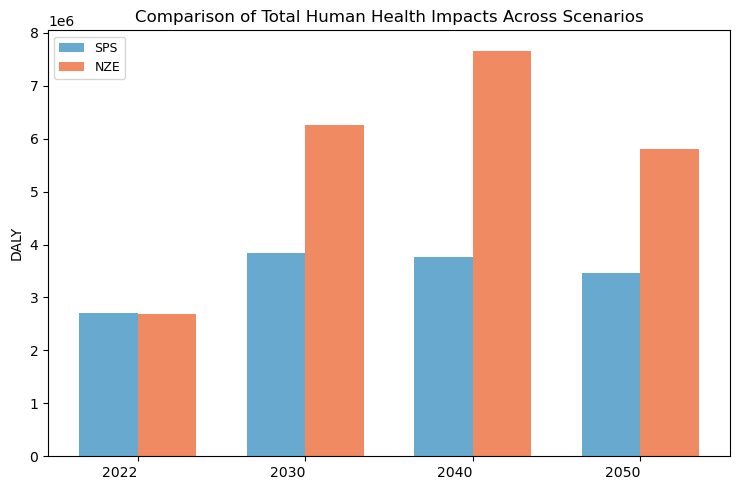

In [168]:
# Plot Total Ecosystem Quality
plot_scenario_comparison(df_sps_damage, df_nze_damage, "Total ecosystem quality",
                         "SPS", "NZE",
                         "Comparison of Total Ecosystem Quality Impacts Across Scenarios",
                         "PDF.m2.yr",
                         colors=("#67a9cf", "#ef8a62"),
                         save_path="results/plots/scenario_comparison/ecosystem_quality")

# Plot Total Human Health
plot_scenario_comparison(df_sps_damage, df_nze_damage, "Total human health",
                         "SPS", "NZE",
                         "Comparison of Total Human Health Impacts Across Scenarios",
                         "DALY",
                         colors=("#67a9cf", "#ef8a62"),
                         save_path="results/plots/scenario_comparison/human_health")


## Sankey

In [50]:
def create_sankey(df, total_col, impact_columns, title, save_path):
    """
    Create a Sankey diagram showing cumulative effects from metals -> technologies -> midpoint indicators.

    Parameters:
    - df: DataFrame with data
    - total_col: Column containing total impact (e.g., 'Total ecosystem quality' or 'Total human health')
    - impact_columns: List of midpoint impact indicators (e.g., EQ or HH categories)
    - title: Title of the Sankey diagram
    - save_path: Path to save the HTML file of the figure

    Outputs:
    - Saves the Sankey diagram as an interactive HTML file and PNG.
    """

    # Ensure directory exists
    os.makedirs(os.path.dirname(save_path), exist_ok=True)

    # Sum impacts over all years (2022-2050)
    df_cumulative = df.groupby(["Metal", "Technology"])[impact_columns + [total_col]].sum().reset_index()

    # Get unique categories
    all_metals = df_cumulative["Metal"].unique().tolist()
    all_technologies = df_cumulative["Technology"].unique().tolist()
    all_midpoints = impact_columns

    # Define node labels (Metals, Technologies, Midpoints)
    node_labels = all_metals + all_technologies + all_midpoints
    node_colors = (
        ["#d53e4f"] * len(all_metals) +  # Metals (red shades)
        ["#5ab4ac"] * len(all_technologies) +  # Technologies (blue-green shades)
        ["#3288bd"] * len(all_midpoints)  # Midpoint Indicators (blue shades)
    )

    # Create node dictionary for indexing
    node_dict = {name: i for i, name in enumerate(node_labels)}

    # Initialize link sources, targets, and values
    sources, targets, values = [], [], []

    # Metal -> Technology links
    for _, row in df_cumulative.iterrows():
        metal_idx = node_dict[row["Metal"]]
        tech_idx = node_dict[row["Technology"]]
        total_flow = row[total_col]  # Total impact flow from Metal to Technology
        sources.append(metal_idx)
        targets.append(tech_idx)
        values.append(total_flow)

    # Technology -> Midpoint Indicator links
    for tech in all_technologies:
        for midpoint in all_midpoints:
            tech_idx = node_dict[tech]
            midpoint_idx = node_dict[midpoint]
            total_flow = df_cumulative[df_cumulative["Technology"] == tech][midpoint].sum()
            sources.append(tech_idx)
            targets.append(midpoint_idx)
            values.append(total_flow)
            
    # Define node positions explicitly
    x_positions = (
    [0.1] * len(all_metals) +   # Metals on the left
    [0.5] * len(all_technologies) +  # Technologies in the middle
    [0.9] * len(all_midpoints)  # Midpoint indicators on the far right
)        
            
    # Create Sankey figure
    fig = go.Figure(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=1),
            label=node_labels,
            color=node_colors,
            x=x_positions,
        ),
        link=dict(
            source=sources,
            target=targets,
            value=values
        )
    ))

    fig.update_layout(
    title_text=title,
    font_size=12,
    font_color="black",  # Ensure text remains visible
    width=1200,
    height=700,
    paper_bgcolor="white",  # Set the entire image background to white
    plot_bgcolor="white"  # Set the plot area background to white
)
    # Save as interactive HTML and PNG
    fig.write_html(f"{save_path}.html")
    #fig.write_image(f"{save_path}.pdf")  # High resolution PNG

    return fig

In [51]:
# Define directory for saving Sankey diagrams
sankey_dir = "results/plots/sankey"
os.makedirs(sankey_dir, exist_ok=True)

In [52]:
fig_sankey_sps_eq = create_sankey(df_sps_damage, "Total ecosystem quality", EQ, "Ecosystem Quality Flow", f"{sankey_dir}/sankey_sps_eq")

In [53]:
fig_sankey_sps_hh = create_sankey(df_sps_damage, "Total human health", HH, "Human Health Flow", f"{sankey_dir}/sankey_sps_hh")

In [54]:
fig_sankey_nze_eq = create_sankey(df_nze_damage, "Total ecosystem quality", EQ, "Ecosystem Quality Flow",
                                  f"{sankey_dir}/sankey_nze_eq")

In [55]:
fig_sankey_nze_hh = create_sankey(df_nze_damage, "Total human health", HH, "Human Health Flow",
                                  f"{sankey_dir}/sankey_nze_hh")